In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [15]:
learning_rate = 0.01
epochs = 200

In [16]:
n_samples = 30
train_x = np.linspace(0, 20, n_samples)
train_y = 3 * train_x + 4 * np.random.randn(n_samples)

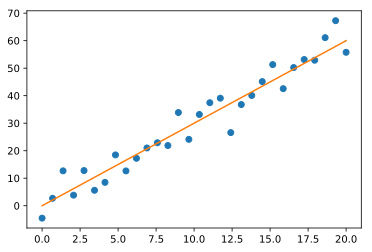

In [17]:
plt.plot(train_x, train_y, 'o')
plt.plot(train_x, 3 * train_x)
plt.show()

In [18]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name='weights')
B = tf.Variable(np.random.randn(), name='bias')

In [19]:
pred = X * W + B
# pred = tf.add(tf.multiply(X, W), B)

cost = tf.reduce_sum((pred - Y) ** 2) / (2 * n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [20]:
init = tf.global_variables_initializer()

epoch: 0000 c=2713852.2500 w=-22.6742 b=-1.5262
epoch: 0020 c=nan w=nan b=nan
epoch: 0040 c=nan w=nan b=nan
epoch: 0060 c=nan w=nan b=nan
epoch: 0080 c=nan w=nan b=nan
epoch: 0100 c=nan w=nan b=nan
epoch: 0120 c=nan w=nan b=nan
epoch: 0140 c=nan w=nan b=nan
epoch: 0160 c=nan w=nan b=nan
epoch: 0180 c=nan w=nan b=nan


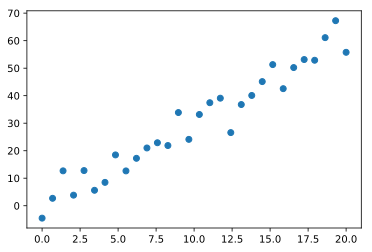

In [21]:
with tf.Session() as sesh:
    sesh.run(init)
    
    for epoch in range(epochs):
        #for x, y in zip(train_x, train_y):
        sesh.run(optimizer, feed_dict={X: train_x, Y: train_x})
            
        if not epoch % 20:
            c = sesh.run(cost, feed_dict={X: train_x, Y: train_y})
            w = sesh.run(W)
            b = sesh.run(B)
            print(f'epoch: {epoch:04d} c={c:.4f} w={w:.4f} b={b:.4f}')
            
    weight = sesh.run(W)
    bias = sesh.run(B)
    plt.plot(train_x, train_y, 'o')
    plt.plot(train_x, weight * train_x + bias)
    plt.show()